In [66]:
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [43]:
del df["Product_Category_2"]
del df["Product_Category_3"]
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [7]:
#How many unique customers are there

df["User_ID"].nunique()

5891

In [8]:
#How many unique products are there
df["Product_ID"].nunique()

3631

In [10]:
#How many different occupations are there
df["Occupation"].nunique()

21

In [11]:
#How much is spent by all the customers on Black Day Sale
df["Purchase"].sum()

5095812742

 # Analyzing Gender columns

In [12]:
df["Gender"]

0         F
1         F
2         F
3         F
4         M
         ..
550063    M
550064    F
550065    F
550066    F
550067    F
Name: Gender, Length: 550068, dtype: object

In [9]:
#Counting number of males and females
len(df[df["Gender"]=='M']), len(df[df["Gender"]=='F'])

#or
df.groupby('Gender').size()

Gender
F    135809
M    414259
dtype: int64

<Axes: ylabel='count'>

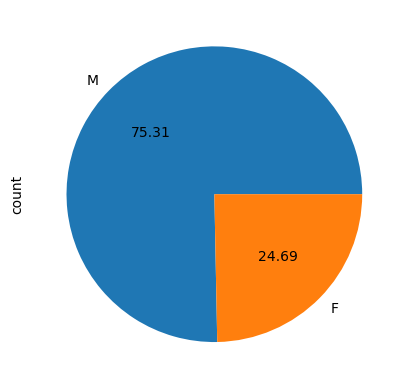

In [19]:
#Comparing males and females through pie chart
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f")


<Axes: xlabel='Gender'>

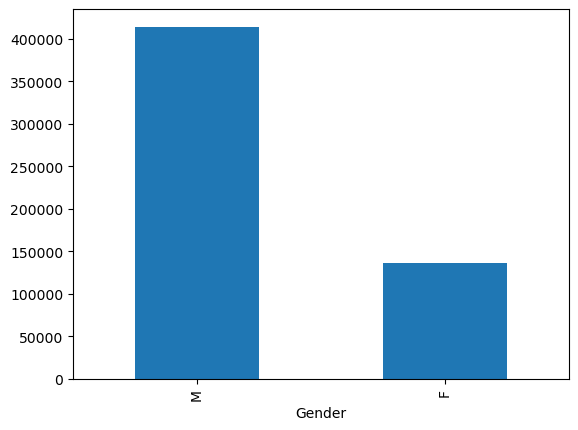

In [20]:
#Comparing males and females through bar graph
df["Gender"].value_counts().plot(kind="bar")


<Axes: ylabel='Purchase'>

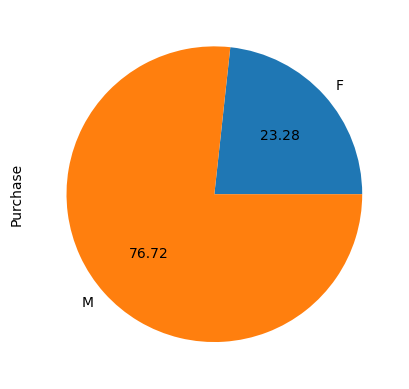

In [13]:
#Amount male and female have paid
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct='%.2f)

# Analysing Age columns

In [20]:
df.groupby('Age').size()

Age
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
dtype: int64

<Axes: xlabel='Age'>

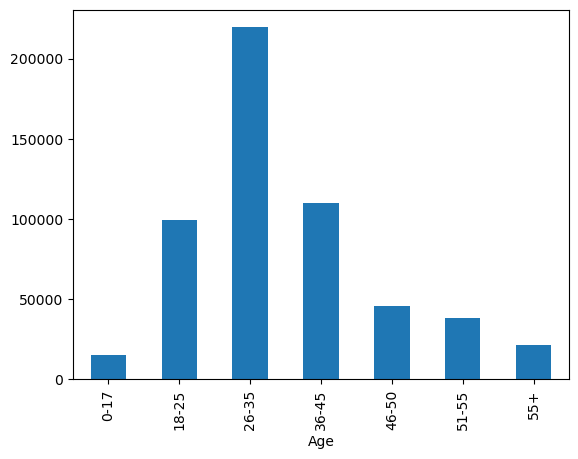

In [21]:
df.groupby('Age').size().plot(kind='bar')

In [22]:
#The products bought by people in the range of 0-17

df[df['Age']=='0-17']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
85,1000019,P00112542,M,0-17,10,A,3,0,1,11.0,15.0,7746
...,...,...,...,...,...,...,...,...,...,...,...,...
549904,1005803,P00375436,M,0-17,10,C,1,0,20,NaN,NaN,256
550012,1005953,P00370853,M,0-17,10,B,0,0,19,NaN,NaN,26
550024,1005973,P00370293,M,0-17,10,C,4+,0,19,NaN,NaN,12
550035,1005989,P00370853,F,0-17,10,C,3,0,19,NaN,NaN,61


In [50]:
#How many unique products are purchased by each age group
lst=[]

for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])

data=pd.DataFrame(lst,columns=['Age','Products'])

<Axes: xlabel='Age'>

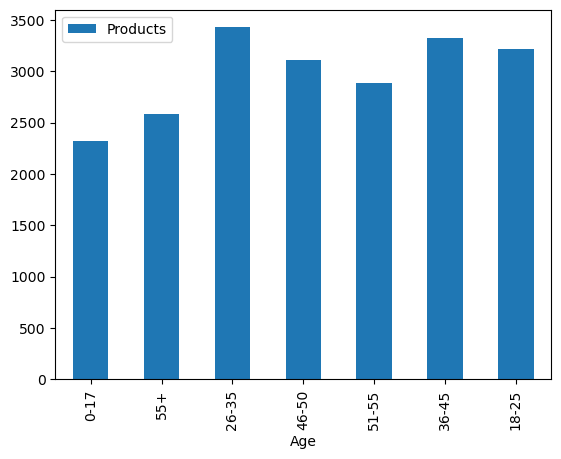

In [53]:
data.plot(kind='bar',x='Age')

<Axes: xlabel='Age'>

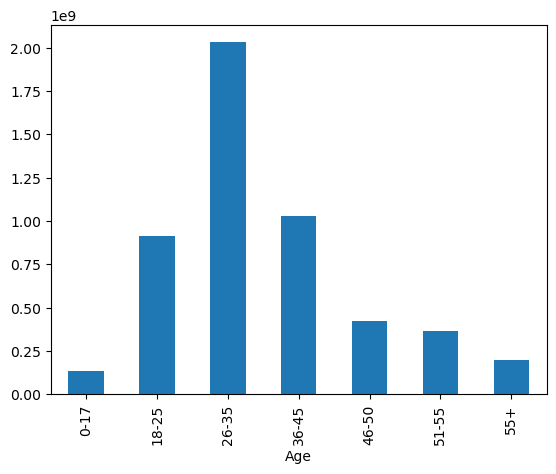

In [60]:
#Amount spent by each age group
df.groupby('Age').sum()['Purchase'].plot(kind='bar')

<Axes: title={'center': 'Amount spent by each age group'}, ylabel='Purchase'>

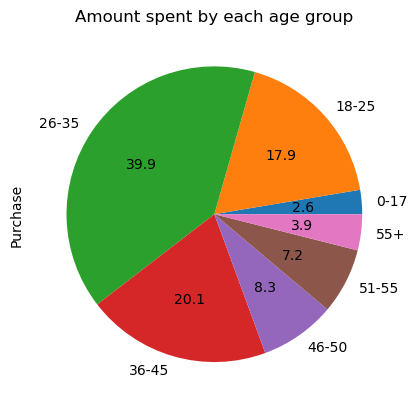

In [63]:
df.groupby('Age').sum()['Purchase'].plot(kind='pie',autopct='%.1f',title='Amount spent by each age group')

# Analysing multiple columns

<Axes: xlabel='Age', ylabel='count'>

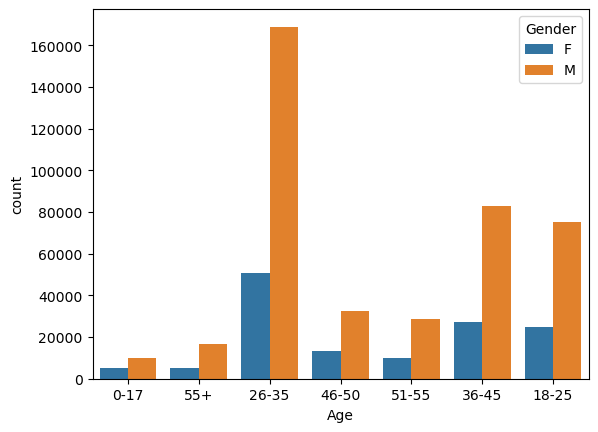

In [69]:
#Comparing age and gender column
sns.countplot(x='Age',hue='Gender',data=df)

<Axes: xlabel='Gender', ylabel='count'>

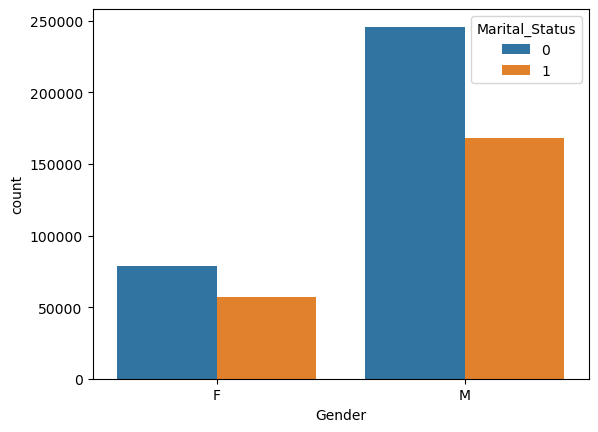

In [72]:
#Comparing gender and marital status column
sns.countplot(x='Gender',hue='Marital_Status',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

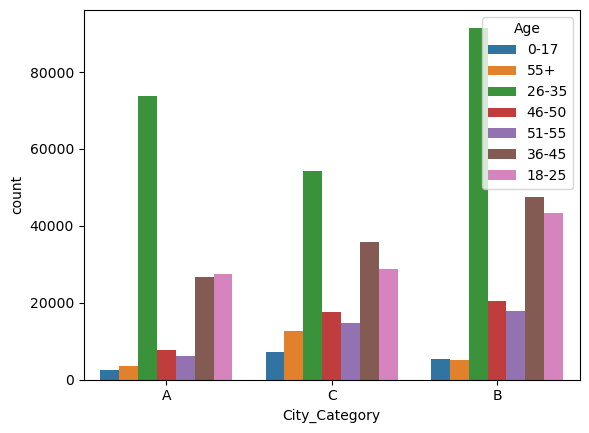

In [74]:
#Comparing city category and age
sns.countplot(x='City_Category',hue='Age',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

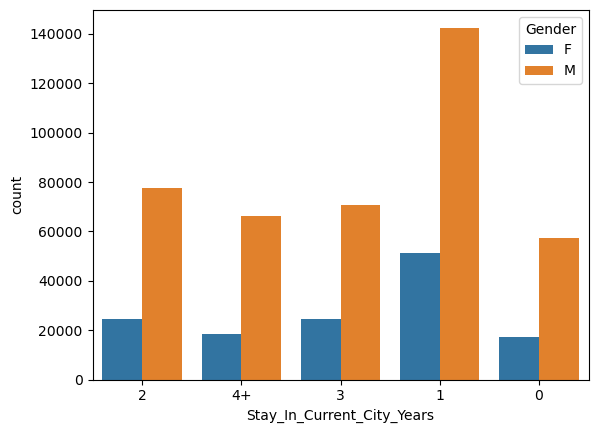

In [79]:
#Comparing who stayed in current city for more years based on Gender
sns.countplot(x=df['Stay_In_Current_City_Years'],hue='Gender',data=df)


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

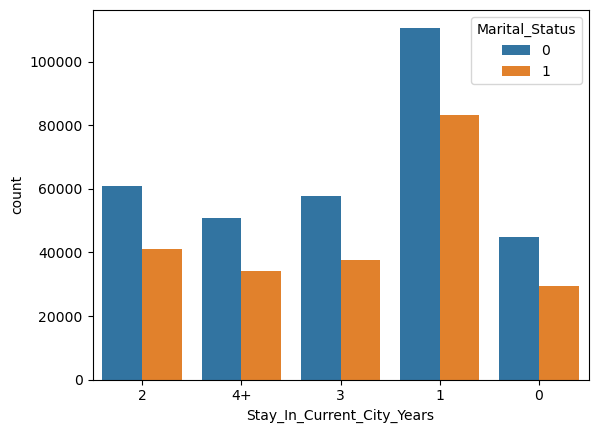

In [81]:
#Comparing who stayed in current city for more years based on marital status

sns.countplot(x='Stay_In_Current_City_Years',hue='Marital_Status',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

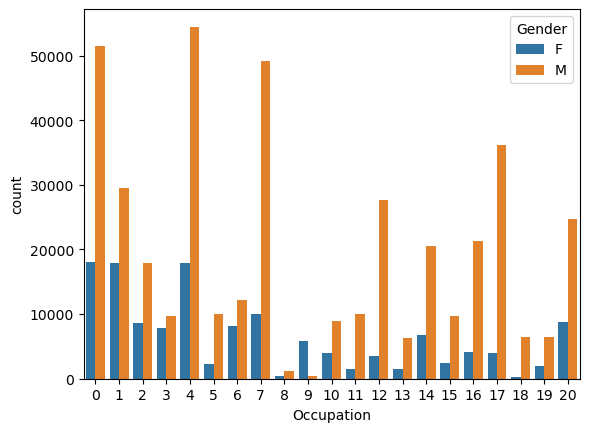

In [83]:
#Comparing who have occupation gender wise
sns.countplot(x='Occupation',hue='Gender',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

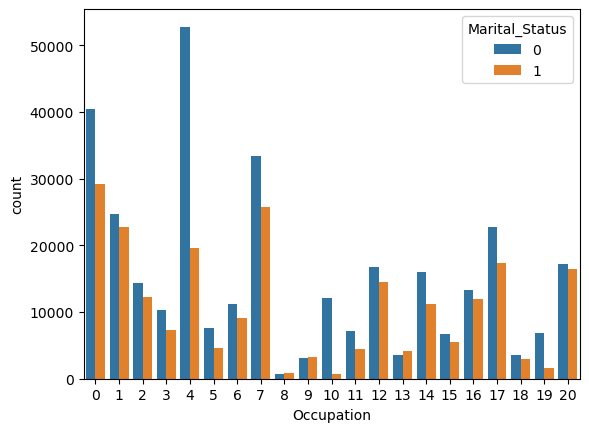

In [84]:
#Comparing who have occupation based on marital status
sns.countplot(x='Occupation',hue='Marital_Status',data=df)

<Axes: xlabel='Occupation'>

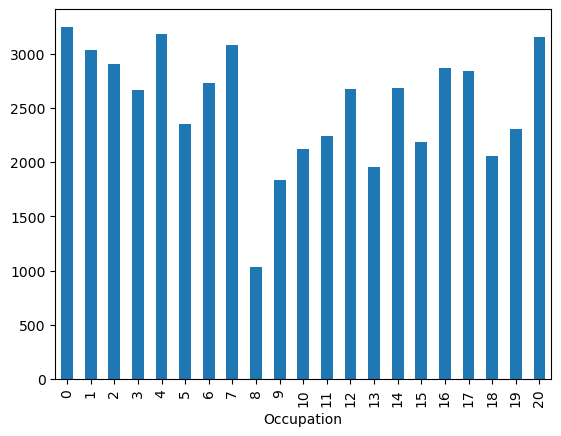

In [89]:
#Comapring people who are of same occupation, how unique products they buy
df.groupby('Occupation').nunique()['Product_ID'].plot(kind='bar')

<Axes: xlabel='Product_ID'>

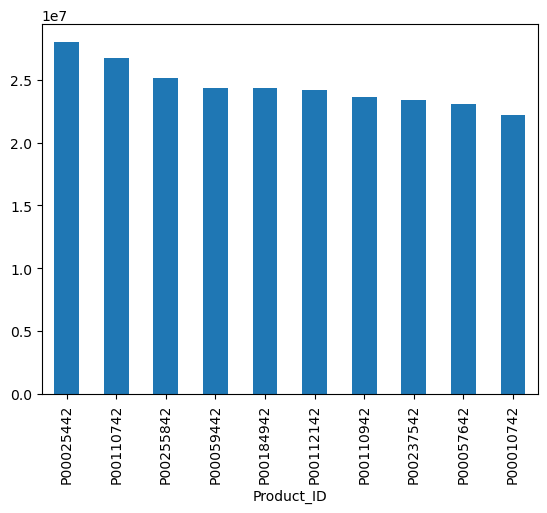

In [107]:
#How much amount of different products have been brought
#Showing the products, where people have spent most money
#Only taking the top 10 items

df.groupby('Product_ID').sum()['Purchase'].nlargest(10).plot(kind='bar')

<Axes: xlabel='Product_ID'>

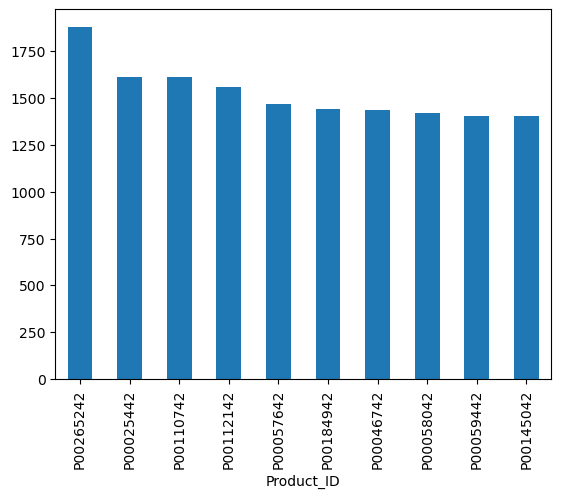

In [93]:
#Shows which product has been bought the most
df.groupby('Product_ID').size().nlargest(10).plot(kind='bar')

<Axes: xlabel='Product_ID'>

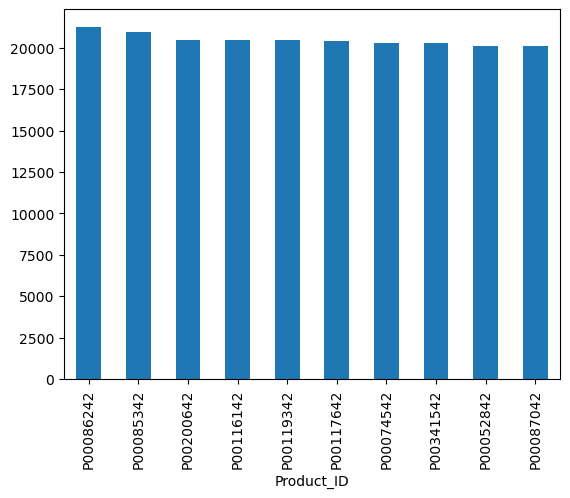

In [105]:
#Shows which products are the most expensive

df.groupby('Product_ID')['Purchase'].mean().nlargest(10).plot(kind='bar')

# Analysing by combining the gender and marital status

In [119]:
l=[]

for i in range(len(df)):
    l.append(df["Gender"][i]+"_"+str(df["Marital_Status"][i]))
    
    

In [120]:
df['Marital_Gender']=l

<Axes: xlabel='Marital_Gender', ylabel='count'>

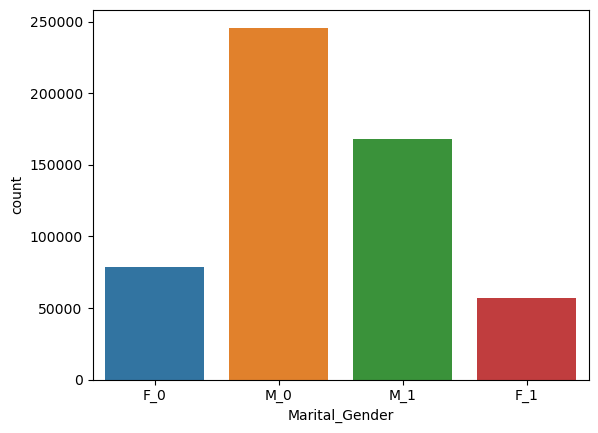

In [122]:
sns.countplot(x=df['Marital_Gender'])

<Axes: xlabel='Age', ylabel='count'>

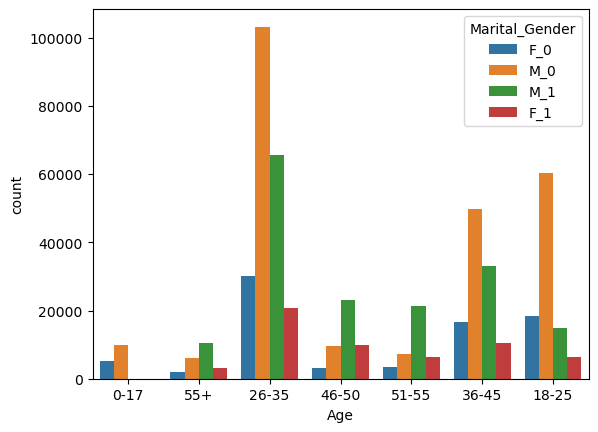

In [123]:
#Comparing age wise the marital gender 
sns.countplot(x='Age',hue='Marital_Gender',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

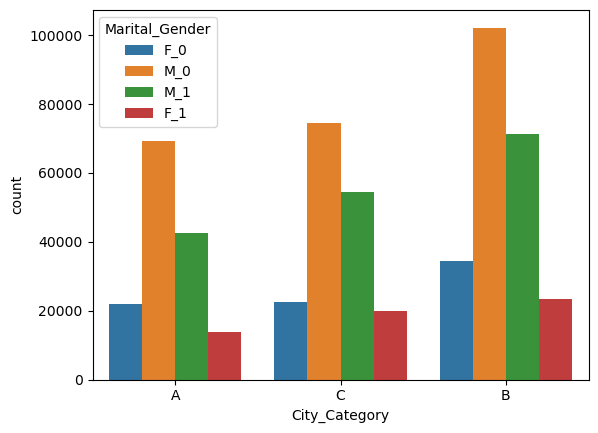

In [124]:
#Comparing city category and marital gender
sns.countplot(x='City_Category',hue='Marital_Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

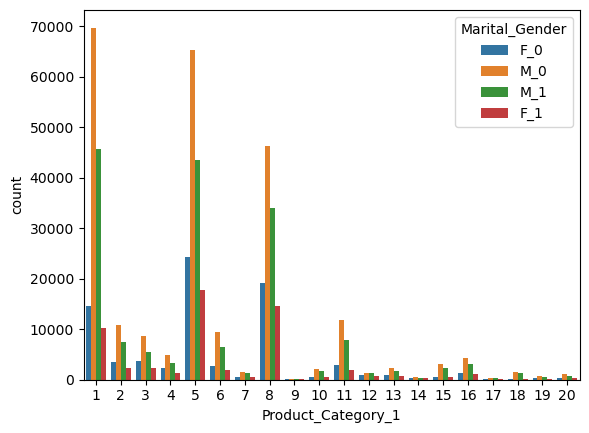

In [125]:
#Comparing product category_1 and marital gender
sns.countplot(x='Product_Category_1',hue='Marital_Gender',data=df)